In [1]:
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv(r"C:\Users\OFF-LAPTOP\Desktop\excel data\fp.csv")

In [5]:
df.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [7]:
df.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


<AxesSubplot:>

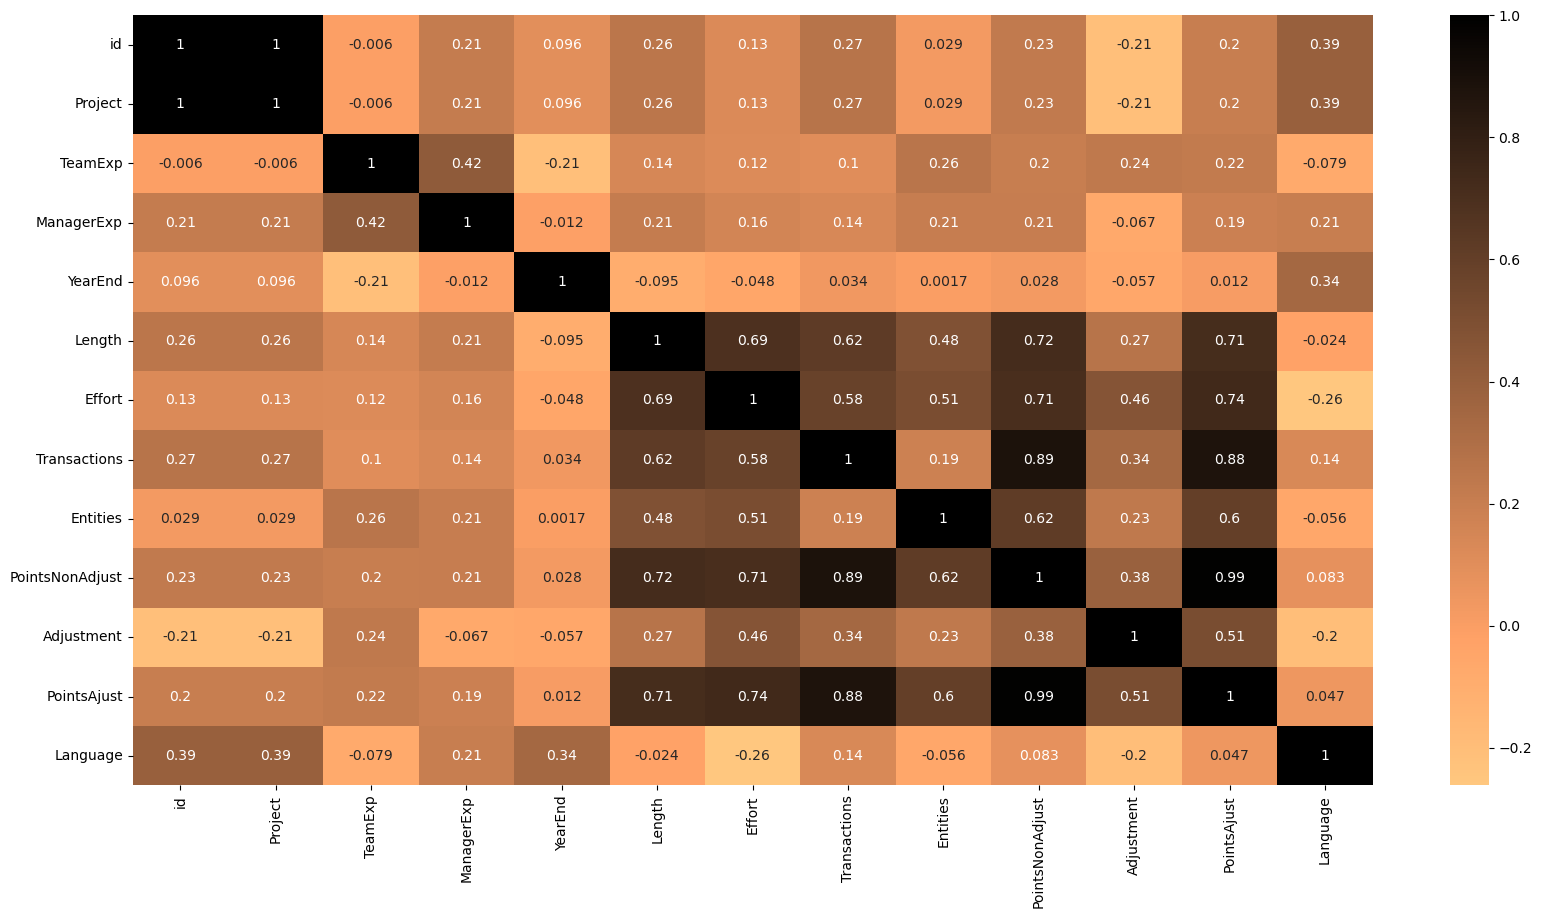

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='copper_r')

In [9]:
df.isnull()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,False,False,False,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False,False,False,False,False
78,False,False,False,False,False,False,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [11]:
X = df[['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language']]
X

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,253,52,305,34,302,1
1,2,2,0,0,86,4,197,124,321,33,315,1
2,3,3,4,4,85,1,40,60,100,18,83,1
3,4,4,0,0,86,5,200,119,319,30,303,1
4,5,5,0,0,86,4,140,94,234,24,208,1
...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,77,4,4,85,12,229,169,398,39,414,3
77,78,78,4,3,83,12,227,73,300,34,297,1
78,79,79,4,4,82,24,395,193,588,40,617,1
79,80,80,4,3,86,12,469,176,645,43,697,3


In [12]:
Y=df[['Effort']]
Y

,Effort
0,5152
1,5635
2,805
3,3829
4,2149
...,...
76,1400
77,2800
78,9520
79,5880


# LINEAR REGRESSION -1

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
LR = LinearRegression()
LR.fit(X_train, y_train)
Predict = LR.predict(X_test)

In [15]:
Predict

array([[ 3388.53721382],
       [ 6826.81075374],
       [ 8040.2464331 ],
       [ -113.85638413],
       [ 4974.40470539],
       [ 5823.39404123],
       [ 4677.30202027],
       [   78.16577863],
       [ 3381.79720677],
       [ 1810.27036406],
       [ 4094.83724702],
       [ 4786.80596146],
       [ 1244.40016762],
       [ 7394.66946378],
       [ 1355.08812387],
       [ 8954.0665122 ],
       [-1477.74704568]])

In [16]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, Predict)
print("Accuracy:", accuracy)

Accuracy: 0.7038267001593004


In [17]:
df.columns

Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

In [18]:
df.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [ ]:
print("enter price ")
A = int(input("id): "))
B = int(input("Project: "))
C = int(input("TeamExp"))
D = int(input("ManagerExp: "))
E = int(input("YearEnd "))
F = int(input("Length"))

G = int(input("Transactions): "))
H = int(input("Entities: "))
I = int(input("PointsNonAdjust"))
J = int(input("Adjustment: "))
K = int(input("PointsAjust "))
L = int(input("Language"))
features = np.array([[A,B,C,D,E,F,G,H,I,J,K,L]])
print("Effort (hr): ", LR.predict(features))

# logistic-2

In [16]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Testing data evaluation
ypredtest = log_model.predict(X_test)

Accuracy = accuracy_score(y_test,ypredtest)
print('Accuracy:',Accuracy)

Classification_report = classification_report(y_test,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.0
Classification_report: 
               precision    recall  f1-score   support

         546       0.00      0.00      0.00       1.0
         595       0.00      0.00      0.00       1.0
         710       0.00      0.00      0.00       1.0
         847       0.00      0.00      0.00       0.0
        1155       0.00      0.00      0.00       0.0
        1267       0.00      0.00      0.00       1.0
        1575       0.00      0.00      0.00       0.0
        1876       0.00      0.00      0.00       0.0
        2149       0.00      0.00      0.00       1.0
        2282       0.00      0.00      0.00       1.0
        2429       0.00      0.00      0.00       0.0
        2548       0.00      0.00      0.00       1.0
        2926       0.00      0.00      0.00       0.0
        3164       0.00      0.00      0.00       0.0
        3927       0.00      0.00      0.00       1.0
        4067       0.00      0.00      0.00       1.0
        4494       0.00      0.00      0.0

In [18]:
ypredtrain = log_model.predict(X_train)

Accuracy = accuracy_score(y_train,ypredtrain)
print('Accuracy:',Accuracy)


Classification_report = classification_report(y_train,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 1.0
Classification_report: 
               precision    recall  f1-score   support

         651       1.00      1.00      1.00         1
         805       1.00      1.00      1.00         1
         840       1.00      1.00      1.00         1
         847       1.00      1.00      1.00         1
        1155       1.00      1.00      1.00         1
        1400       1.00      1.00      1.00         1
        1435       1.00      1.00      1.00         1
        1575       1.00      1.00      1.00         1
        1603       1.00      1.00      1.00         1
        1617       1.00      1.00      1.00         1
        1876       1.00      1.00      1.00         1
        2174       1.00      1.00      1.00         1
        2275       1.00      1.00      1.00         1
        2331       1.00      1.00      1.00         1
        2352       1.00      1.00      1.00         1
        2422       1.00      1.00      1.00         1
        2429       1.00      1.00      1.0

### knn


In [19]:
from sklearn.neighbors import KNeighborsRegressor  
err_rate = []

for i in range(1,40,2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

In [20]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()

In [21]:
c =KNN.fit(X_train,y_train)
c

KNeighborsRegressor()

In [22]:
y_pred =KNN.predict(X_test)
y_pred

array([[2945.6],
       [3976. ],
       [7469. ],
       [1734.6],
       [4530.4],
       [5063.8],
       [5483.8],
       [2020.2],
       [3921.4],
       [1886.6],
       [3110.8],
       [4887.4],
       [1876.8],
       [5476.8],
       [2224. ],
       [4258.8],
       [2741.2]])

In [23]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix

# random forest-4


In [25]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [26]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.5834883316228845

# GradientBoostingRegressor-5 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

R_squared : 0.6450561011563039


#  neural network 7

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [31]:
cat = X.columns[X.dtypes=='object']
con = X.columns[X.dtypes!='object']

In [32]:
cat

Index([], dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [34]:
nn = Sequential()

# Layer 1
nn.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

# Layer 2
nn.add(Dense(64,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

# Output Layer
nn.add(Dense(1,activation='linear'))

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=30)
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])
hist = nn.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=32,callbacks=[early_stop])

Epoch 1/200
2/2 [==============================] - 5s 1s/step - loss: 42804048.0000 - mae: 4803.7241 - val_loss: 67320888.0000 - val_mae: 6666.5210
Epoch 2/200
2/2 [==============================] - 0s 122ms/step - loss: 42798500.0000 - mae: 4803.4438 - val_loss: 67320344.0000 - val_mae: 6666.5156
Epoch 3/200
2/2 [==============================] - 0s 84ms/step - loss: 42797528.0000 - mae: 4803.3765 - val_loss: 67319824.0000 - val_mae: 6666.5137
Epoch 4/200
2/2 [==============================] - 0s 80ms/step - loss: 42789808.0000 - mae: 4803.3008 - val_loss: 67319216.0000 - val_mae: 6666.5049
Epoch 5/200
2/2 [==============================] - 0s 91ms/step - loss: 42791736.0000 - mae: 4803.4731 - val_loss: 67318544.0000 - val_mae: 6666.4922
Epoch 6/200
2/2 [==============================] - 0s 78ms/step - loss: 42788100.0000 - mae: 4803.2622 - val_loss: 67317872.0000 - val_mae: 6666.4824
Epoch 7/200
2/2 [==============================] - 0s 81ms/step - loss: 42782892.0000 - mae: 4803.079

In [36]:
nn.evaluate(X_train,y_train)

2/2 [==============================] - 0s 9ms/step - loss: 47344168.0000 - mae: 5175.8462


[47344168.0, 5175.84619140625]

In [37]:
ypred_tr = nn.predict(X_train)
ypred_ts = nn.predict(X_test)

1/1 [==============================] - 0s 111ms/step


In [38]:
y_train.head()

,Effort
61,1876
55,8232
40,4620
9,2422
64,3626


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
tr_mse = mean_squared_error(y_train,ypred_tr)
tr_rmse = tr_mse**(1/2)
tr_mae = mean_absolute_error(y_train,ypred_tr)
tr_r2 = r2_score(y_train,ypred_tr)

In [40]:
print('Training Results :')
print('MSE :',tr_mse)
print('RMSE:',tr_rmse)
print('MAE :',tr_mae)
print('R2  :',tr_r2)

Training Results :
MSE : 47344169.73409017
RMSE: 6880.709973112525
MAE : 5175.845921188593
R2  : -1.262001829777053


In [41]:
ts_mse = mean_squared_error(y_test,ypred_ts)
ts_rmse = ts_mse**(1/2)
ts_mae = mean_absolute_error(y_test,ypred_ts)
ts_r2 = r2_score(y_test,ypred_ts)

In [42]:
print('Testing Results :')
print('MSE :',ts_mse)
print('RMSE:',ts_rmse)
print('MAE :',ts_mae)
print('R2  :',ts_r2)

Testing Results :
MSE : 33257534.5407104
RMSE: 5766.934587864717
MAE : 4547.080477057134
R2  : -1.6066444977055858


In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [44]:
nn = Sequential()

#LSTM Layer 1
nn.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
nn.add(Dropout(0.2))

#LSTM Layer 2
nn.add(LSTM(50,return_sequences=True))
nn.add(Dropout(0.2))

# LSTM Layer 3
nn.add(LSTM(50))
nn.add(Dropout(0.2))

# Final Dense Layer
nn.add(Dense(1,activation='linear'))

In [45]:
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [46]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])


In [47]:
hist = nn.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
2/2 [==============================] - 7s 24ms/step - loss: 47782416.0000 - mae: 5181.9131
Epoch 2/30
2/2 [==============================] - 0s 24ms/step - loss: 47781596.0000 - mae: 5181.8682
Epoch 3/30
2/2 [==============================] - 0s 24ms/step - loss: 47780688.0000 - mae: 5181.8145
Epoch 4/30
2/2 [==============================] - 0s 22ms/step - loss: 47779564.0000 - mae: 5181.7422
Epoch 5/30
2/2 [==============================] - 0s 23ms/step - loss: 47777736.0000 - mae: 5181.6348
Epoch 6/30
2/2 [==============================] - 0s 22ms/step - loss: 47775608.0000 - mae: 5181.4937
Epoch 7/30
2/2 [==============================] - 0s 23ms/step - loss: 47772640.0000 - mae: 5181.2900
Epoch 8/30
2/2 [==============================] - 0s 22ms/step - loss: 47768528.0000 - mae: 5180.9473
Epoch 9/30
2/2 [==============================] - 0s 24ms/step - loss: 47762148.0000 - mae: 5180.5244
Epoch 10/30
2/2 [==============================] - 0s 22ms/step - loss: 47754244.0

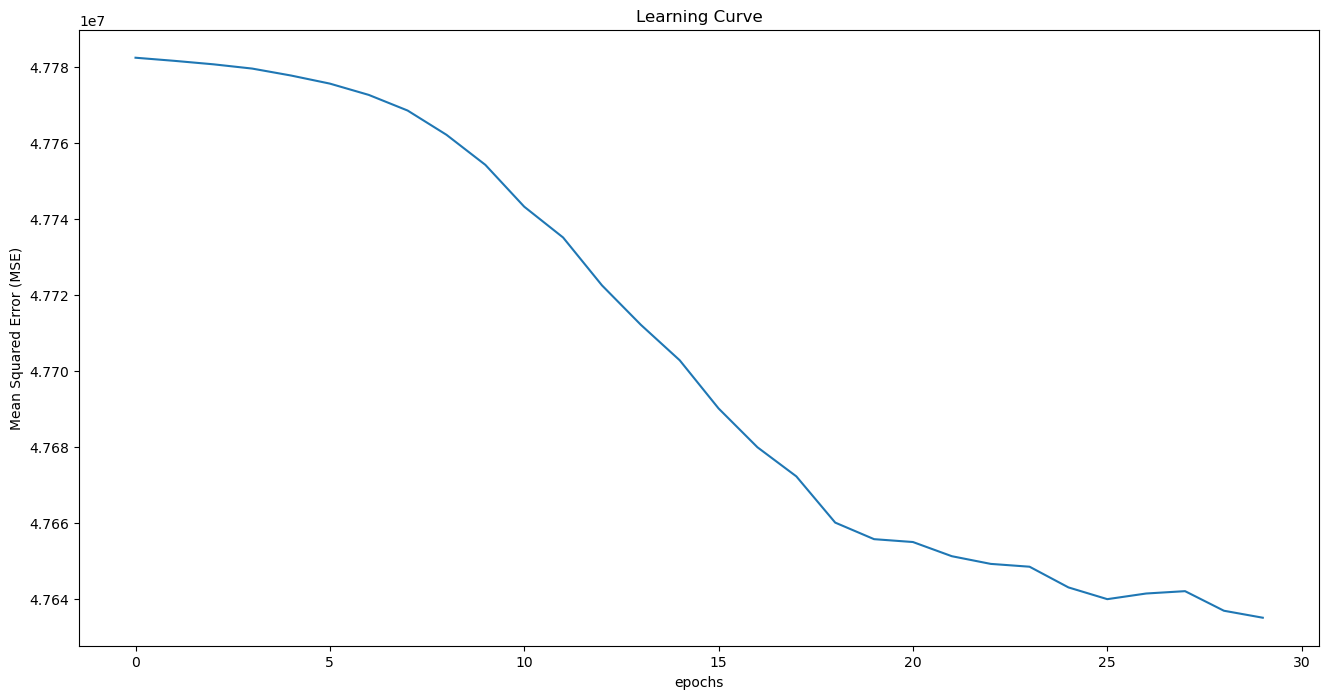

In [48]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curve')
plt.show()

In [49]:
nn.evaluate(X_train,y_train)


2/2 [==============================] - 1s 11ms/step - loss: 47633720.0000 - mae: 5167.5459


[47633720.0, 5167.5458984375]

In [50]:
nn.evaluate(X_test,y_test)


1/1 [==============================] - 1s 1s/step - loss: 33201710.0000 - mae: 4521.3906


[33201710.0, 4521.390625]

In [51]:
ypred_tr = nn.predict(X_train)
ypred_ts = nn.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [52]:
ypred_tr[0:3]

array([[14.371421],
       [14.382035],
       [14.377008]], dtype=float32)

In [53]:
ypred_ts[0:5]

array([[14.372968],
       [14.375828],
       [14.377618],
       [14.372161],
       [14.379946]], dtype=float32)

In [54]:
ypred_tract=scaler.inverse_transform(ypred_tr)
ypred_tsact=scaler.inverse_transform(ypred_ts)

ValueError: non-broadcastable output operand with shape (64,1) doesn't match the broadcast shape (64,12)

In [ ]:
ypred_tract[0:5]

In [ ]:
print("enter price ")
A = int(input("id): "))
B = int(input("Project: "))
C = int(input("TeamExp"))
D = int(input("ManagerExp: "))
E = int(input("YearEnd "))
F = int(input("Length"))

G = int(input("Transactions): "))
H = int(input("Entities: "))
I = int(input("PointsNonAdjust"))
J = int(input("Adjustment: "))
K = int(input("PointsAjust "))
L = int(input("Language"))
features = np.array([[A,B,C,D,E,F,G,H,I,J,K,L]])
print(" nn-Effort: ", nn.predict(features))
print("line-Effort: ", LR.predict(features))
print("log-Effort: ", log_model.predict(features))
print("knn-Effort: ", KNN.predict(features))

print("gbt-Effort: ", gbt.predict(features))
print("rf-Effort: ", rf.predict(features))



enter price 
